# 911 Call Data Capstone Project 
### Aspired by Jose Portilla's udemy course

#### importing libraries

In [49]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import cufflinks as cf
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import chart_studio as cs
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
from plotly import tools


In [2]:
init_notebook_mode(connected=True)
%matplotlib inline
cf.go_offline()

#### importing the data into DataFrame

the data is missing some months

In [3]:
df = pd.read_csv('911.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


#### Creating new features to the dataframe

creating a 'reason' column - extracting the reason 'umbrella name' from the 'title' and saving it

In [6]:
df['reason'] = df['title'].apply(lambda x: x.split(':')[0])

converting the timeStamp column from string to dateTime object and extracting knowledge out of it

In [7]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
print("timeStamp object is :",type(df['timeStamp'][0]))

timeStamp object is : <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [8]:
df['Month'] = df['timeStamp'].apply(lambda x : x.month)
df['Hour'] = df['timeStamp'].apply(lambda x : x.hour)
df['Day of week'] = df['timeStamp'].apply(lambda x : x.dayofweek)
df['Date'] = df['timeStamp'].apply(lambda x : x.date())
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of week'] = df['Day of week'].map(dmap)

fuction to set legend position (for either subplots or normal plot)

In [9]:
def setLegendPosition(axes,size,counter = 0):
    for axe in axes:
        axes[counter].legend(bbox_to_anchor=(1.02, 0.6),borderaxespad=0,fontsize=size)
        counter+=1

In [10]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Month,Hour,Day of week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,12,17,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,12,17,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,12,17,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,12,17,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,12,17,Thu,2015-12-10


#### Concluding the highest call count in regards to twp or zipcode

In [11]:
s1 = df['zip'].value_counts().iloc[:5]
s1Values = df['zip'].value_counts().iloc[:5].tolist()
s1IndexValues = s1.index.values
#print(s1,'\n')
#print(s1IndexValues,'\n')
#print(s1Values)

In [12]:
s2 = df['twp'].value_counts().iloc[:5]
s2Values = df['twp'].value_counts().iloc[:5].tolist()
s2IndexValues = s2.index.values
#print(s2,'\n')
#print(s2IndexValues,'\n')
#print(s2Values)

In [13]:
data = {'zipcode':s1IndexValues,'zipcode call count':s1Values,'twp':s2IndexValues,'twp call count':s2Values}
dataFrame = pd.DataFrame(data)
dataFrame

,zipcode,zipcode call count,twp,twp call count
0,19401.0,6979,LOWER MERION,8443
1,19464.0,6643,ABINGTON,5977
2,19403.0,4854,NORRISTOWN,5890
3,19446.0,4748,UPPER MERION,5227
4,19406.0,3174,CHELTENHAM,4575


#### Plots

In [14]:
df['reason'].iplot(kind='hist',title='Count by reason')

#### distribution of reason

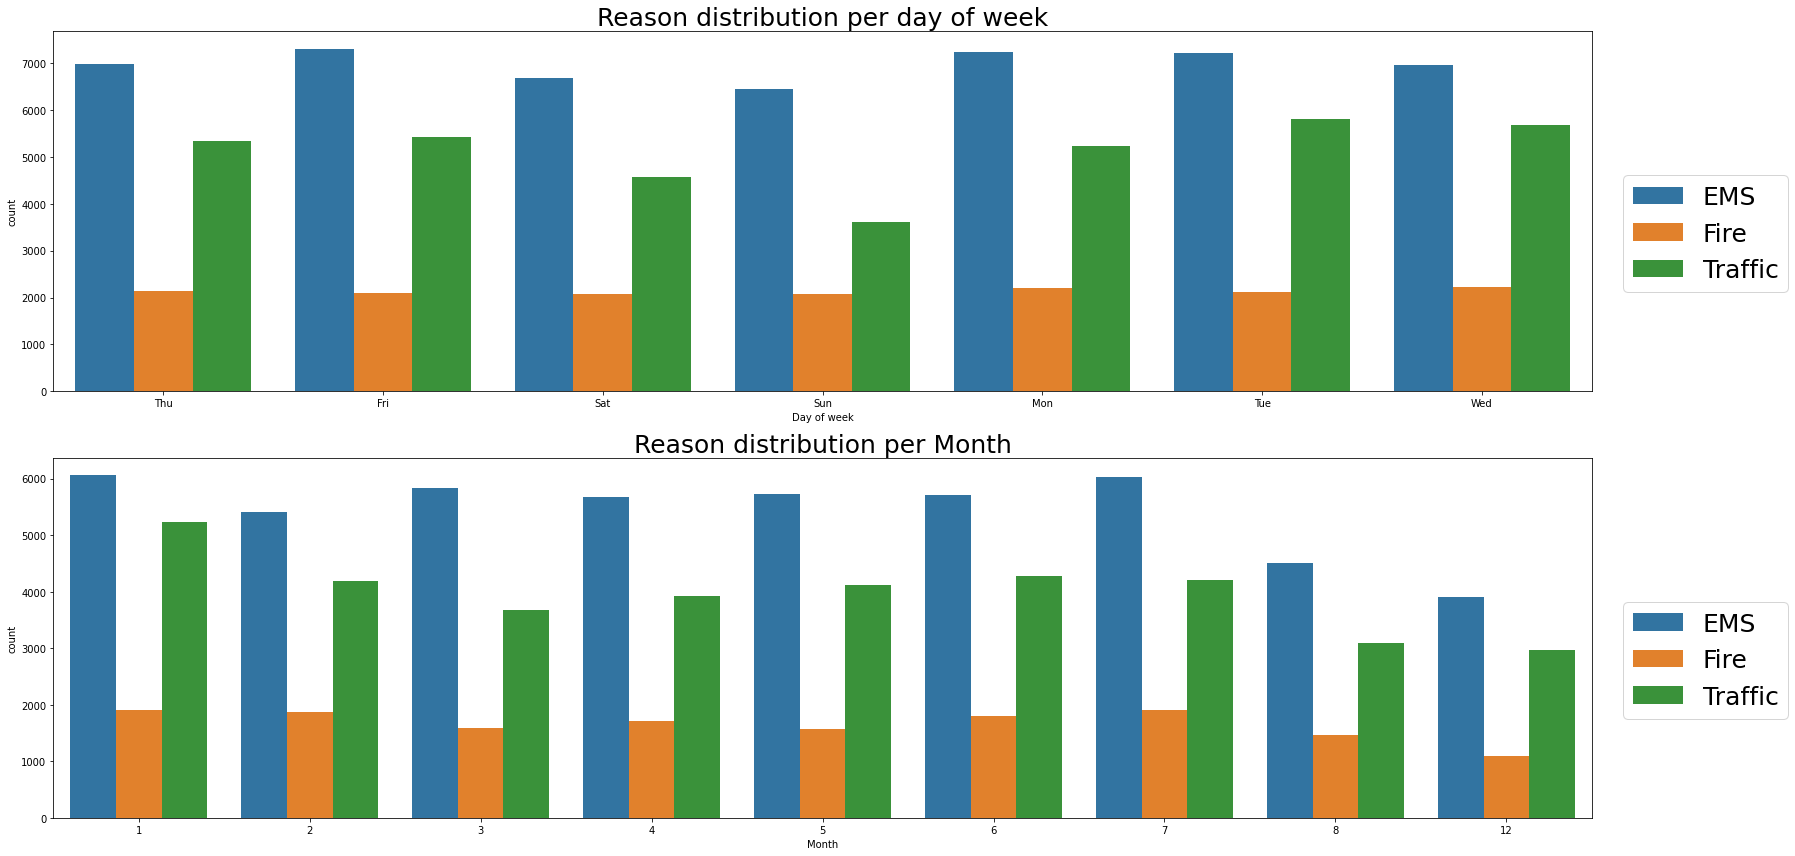

In [15]:
fig, axes = plt.subplots(2,1,figsize=(25,12))
#Plot 1
sns.countplot(x='Day of week',hue='reason',data=df,ax=axes[0])
axes[0].set_title('Reason distribution per day of week',size=25)
#Plot 2
sns.countplot(x='Month',hue='reason',data=df,ax=axes[1])
axes[1].set_title('Reason distribution per Month',size=25)
setLegendPosition(axes,25) #refer to 'creating new features' section
plt.tight_layout()

#### Calls per month

Text(0.5, 1.0, 'calls per month')

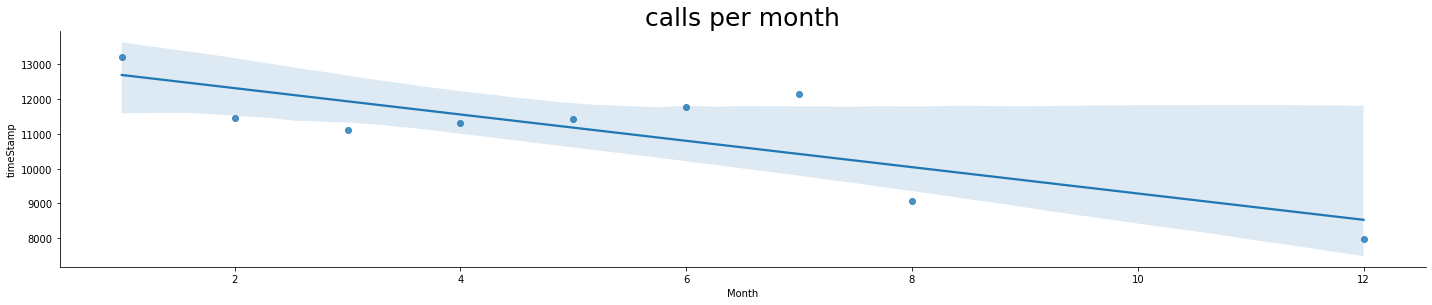

In [16]:
byMonth = df.groupby('Month').count()
byMonth.iplot(kind='bar',y='timeStamp',title='calls per month (hover mouse for specific number',xTitle='Month',yTitle='Calls',bins=50)
sns.lmplot(x='Month',y='timeStamp', data=byMonth.reset_index(),height=4, aspect=5).fig.gca().set_title('calls per month',size=25)

#### calls per day

<AxesSubplot:title={'center':'Traffic'}, xlabel='Date'>

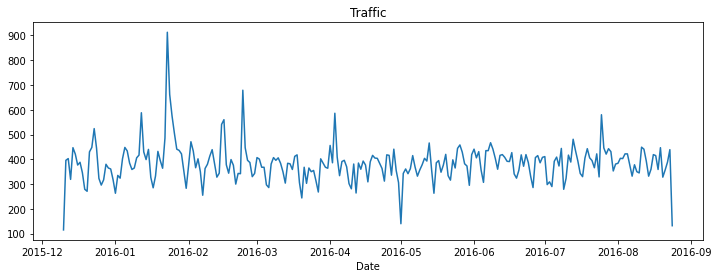

In [17]:
plt.figure(figsize=(12,4))
plt.title('Traffic')
byDate = df.groupby('Date').count()
byDate['lat'].plot()

#### Calls by reason

option 1

In [44]:
#by reason
byDate = df.groupby(['reason','Date']).count()
#by EMS
byEMS = byDate.loc[['EMS']]
#by Fire
byFire = byDate.loc[['Fire']]
#by Traffic
byTraffic = byDate.loc[['Traffic']]

byEMS.iplot(kind='line',y='timeStamp',title='EMS Calls (hover mouse for specific number',xTitle='Date',yTitle='Calls')
byFire.iplot(kind='line',y='timeStamp',title='Fire Calls (hover mouse for specific number',xTitle='Date',yTitle='Calls')
byTraffic.iplot(kind='line',y='timeStamp',title='Traffic Calls (hover mouse for specific number',xTitle='Date',yTitle='Calls')

option 2

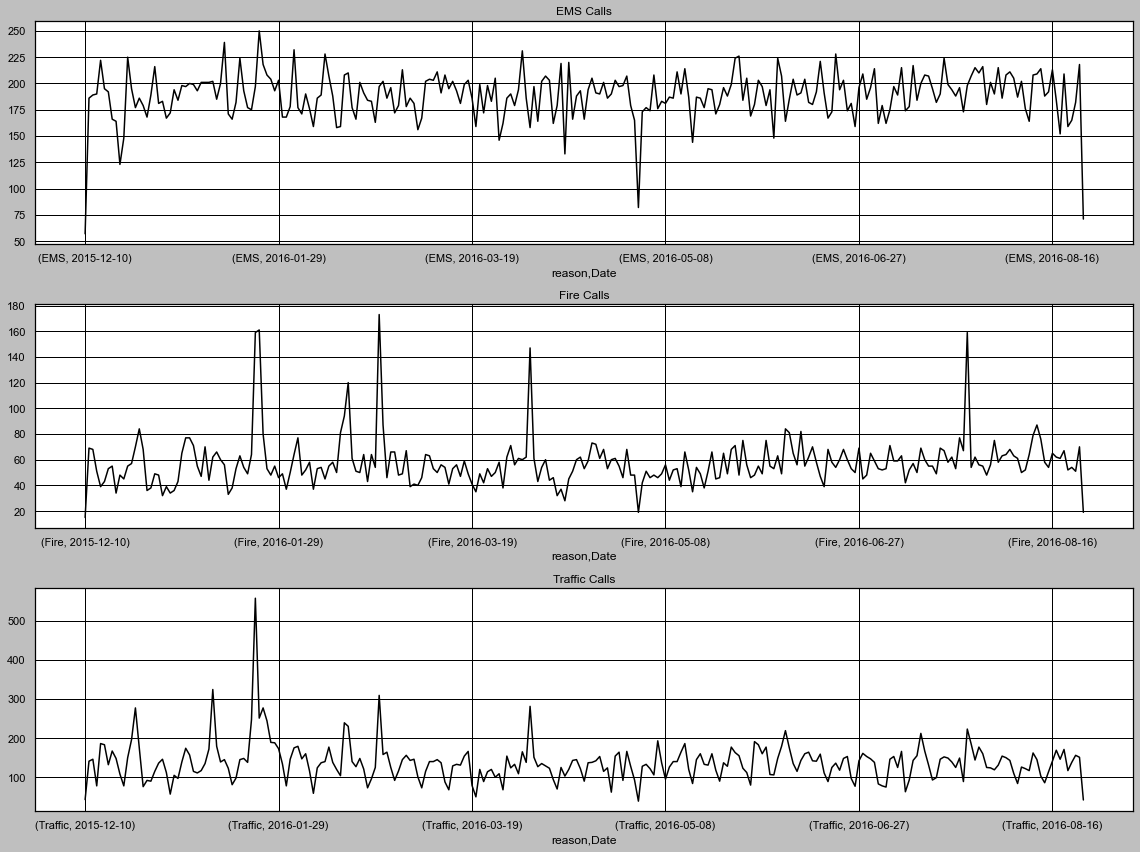

In [74]:
#by reason
byDate = df.groupby(['reason','Date']).count()
#by EMS
byEMS = byDate.loc[['EMS']]
#by Fire
byFire = byDate.loc[['Fire']]
#by Traffic
byTraffic = byDate.loc[['Traffic']]

plt.style.use('grayscale')
fig, axes = plt.subplots(3,1,figsize=(16,12))
byEMS['lat'].plot(ax=axes[0],title='EMS Calls')
byFire['lat'].plot(ax=axes[1],title='Fire Calls')
byTraffic['lat'].plot(ax=axes[2],title='Traffic Calls')
plt.tight_layout()

#### calls heatmap

by hour

In [35]:
df2 = df.groupby(['Day of week','Hour']).count()['reason']
df2 = df2.unstack(level=-1)
df2.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


In [63]:
fig = px.imshow(df2,title='Calls per hour for each day',color_continuous_scale='viridis', height=600, aspect='equal')
fig

by month

In [64]:
df2 = df.groupby(['Day of week','Month']).count()['reason']
df2 = df2.unstack(level=-1)
df2.head()

Month,1,2,3,4,5,6,7,8,12
Day of week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


<AxesSubplot:xlabel='Month', ylabel='Day of week'>

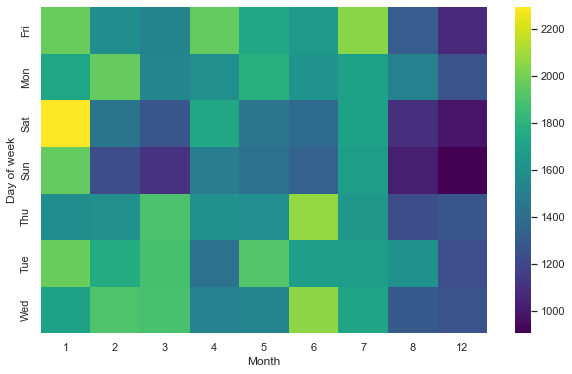

In [68]:
sns.set(rc = {'figure.figsize':(10,6)})
sns.heatmap(df2,cmap="viridis")